## LENDING CLUB

Authors: Daniel Corral, Antonio Pascual

Machine Learning

Máster Data Science para Finanzas

The purpose of this project is to decide if a new client of a bank is granted or not the loan depending on the variables provided at the time of application. For this purpose, the project has been divided into several parts:

1. Reading the Data
2. Showing our dataset
3. Choosing the Target Variable
4. Exploring the Data
5. Data Transformation  
    5.1. Creating Dummies  
    5.2. Scaling  
    5.3. Lasso  
6. Logistic Model
7. SVM
8. Random Forest
9. XGBOOST
10. Conclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV # Ridge
from sklearn.linear_model import Lasso, LassoCV # Lasso
from sklearn.linear_model import LogisticRegression # Log Regression
from sklearn.metrics import r2_score # R^2
from sklearn.model_selection import train_test_split # split data
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler # estandarization
from sklearn import preprocessing # estandarization
from sklearn.ensemble import IsolationForest # outliers
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC # SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve # ROC Curve
from sklearn.datasets import make_classification
import random
random.seed(12345)
from sklearn.impute import KNNImputer

## 1. Reading the Data

We will start our proyect by importing a database of information about loans and clients. The dictionary is found in the same folder as our dataset.

In [2]:
data1 = pd.read_csv('../data/Loan_training_set_1_4.csv', error_bad_lines=False, sep = ';')
data2 = pd.read_csv('../data/Loan_training_set_2_4.csv', error_bad_lines=False, sep = ';')
data3 = pd.read_csv('../data/Loan_training_set_3_4.csv', error_bad_lines=False, sep = ';')
data4 = pd.read_csv('../data/Loan_training_set_4_4.csv', error_bad_lines=False, sep = ';')
bigdata = pd.concat([data1, data2, data3, data4])

C:\Users\34639\anaconda3\envs\lending\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\34639\anaconda3\envs\lending\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\34639\anaconda3\envs\lending\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,129,130,131,134,135,136,139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\34639\anaconda3\envs\lending\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,59) have mixed

In [3]:
data = bigdata

## 2. Showing our dataset

The first step is the exploratory analysis of the data, with the aim of deciding which variables will be relevant to perform our model.

We will start studying the information about the dataset:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884888 entries, 0 to 421096
Columns: 151 entries, id to settlement_term
dtypes: float64(111), object(40)
memory usage: 1.0+ GB


Our dataset has 884888 observations and 151 variables. We will show the first ten observations:

In [5]:
data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,112436985,NaN,6025.0,6025.0,6025.0,36 months,15.05%,209.01,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,112439006,NaN,20400.0,20400.0,20400.0,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,112438929,NaN,13000.0,13000.0,13000.0,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,112230200,NaN,12000.0,12000.0,12000.0,36 months,9.44%,384.06,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,112210041,NaN,6000.0,6000.0,6000.0,36 months,10.42%,194.79,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,112360031,NaN,12000.0,12000.0,12000.0,60 months,15.05%,285.80,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,112038251,NaN,11575.0,11575.0,11575.0,36 months,7.35%,359.26,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,112134207,NaN,20400.0,20400.0,20400.0,60 months,7.97%,413.35,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Choosing the Target Variable

We have to eliminate the observations that indicate that the loan is being paid off, "Current". The reason for eliminating these observations is that you cannot create a model that indicates to whom the loan is being granted through observations from which we do not know how the loan has ended.

In [6]:
data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', nan, 'Default'], dtype=object)

In [7]:
data.loan_status.value_counts()

Current               422650
Fully Paid            345472
Charged Off            97039
Late (31-120 days)     11167
In Grace Period         5507
Late (16-30 days)       2915
Default                   34
Name: loan_status, dtype: int64

In [8]:
data = data[data['loan_status'] != 'Current']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462238 entries, 8 to 421096
Columns: 151 entries, id to settlement_term
dtypes: float64(111), object(40)
memory usage: 536.0+ MB


Once we have eliminated the observations that we do not need, we create the categorical variable "paid", which will take value 0 if the clients comply with the payments, and 1 if the clients have been delayed at some time, including the observations of "In Grace Period", since, from the point of view of the bank, it is not interesting to grant loans to those clients who do not comply with the dates of the established payments.

In [10]:
data['paid'] = np.where((data['loan_status'] == 'Fully Paid'), 0, 1)

<ipython-input-10-1bb9c841cb29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['paid'] = np.where((data['loan_status'] == 'Fully Paid'), 0, 1)


Now we delete the variable loan_status:

In [11]:
del data['loan_status']

## 4. Exploring the Data

We will eliminate the variables that provide future information, and therefore, information that the bank does not have when deciding whether to grant a loan or not.

In [12]:
del data['collection_recovery_fee']
del data['desc']
del data['funded_amnt']
del data['funded_amnt_inv']
del data['initial_list_status']
del data['issue_d']
del data['last_credit_pull_d']
del data['last_pymnt_amnt']
del data['last_pymnt_d']
del data['next_pymnt_d']
del data['out_prncp']
del data['out_prncp_inv']
del data['pymnt_plan']
del data['title']
del data['url']
del data['total_rec_int']
del data['total_rec_late_fee']
del data['total_rec_prncp']
del data['total_pymnt']
del data['total_pymnt_inv']

We eliminate duplicate data to avoid repeated observations:

In [13]:
data.drop_duplicates()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,paid
8,112038251,NaN,11575.0,36 months,7.35%,359.26,A,A4,Solutions Architect,6 years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
10,112149045,NaN,7200.0,36 months,24.85%,285.70,E,E3,Pse,2 years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
24,112052261,NaN,7500.0,36 months,7.35%,232.79,A,A4,Associate Director,7 years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
42,111999259,NaN,10000.0,60 months,16.02%,243.29,C,C5,Biller,7 years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
91,111808508,NaN,14000.0,36 months,16.02%,492.34,C,C5,cdl driver,7 years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421092,36271333,NaN,13000.0,60 months,15.99%,316.07,D,D2,Radiologist Technologist,5 years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
421093,36490806,NaN,12000.0,60 months,19.99%,317.86,E,E3,Painter,1 year,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
421094,36271262,NaN,20000.0,36 months,11.99%,664.20,B,B5,Manager Hotel Operations Oasis,10+ years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Then we begin with the exploratory analysis of the data, in order to study the data and see if there is a correlation between them. 

We begin by studying the variables that are related to the payment of the fees, to see if there can be a relationship between them.

In [14]:
payment = data.loc[:,['installment','open_act_il','total_il_high_credit_limit','mo_sin_old_il_acct','num_il_tl','mths_since_rcnt_il','open_il_12m',
                          'open_il_24m','total_bal_il']]

In [15]:
payment.corr()

,installment,open_act_il,total_il_high_credit_limit,mo_sin_old_il_acct,num_il_tl,mths_since_rcnt_il,open_il_12m,open_il_24m,total_bal_il
installment,1.000000,0.031531,0.184547,0.107773,0.061515,-0.018342,0.008398,0.036025,0.142669
open_act_il,0.031531,1.000000,0.554054,0.147461,0.611993,-0.212965,0.258959,0.344563,0.558740
total_il_high_credit_limit,0.184547,0.554054,1.000000,0.194960,0.594859,-0.256756,0.284420,0.374537,0.957193
mo_sin_old_il_acct,0.107773,0.147461,0.194960,1.000000,0.322983,0.051139,0.041644,0.048024,0.202572
num_il_tl,0.061515,0.611993,0.594859,0.322983,1.000000,-0.240721,0.337196,0.467789,0.585785
mths_since_rcnt_il,-0.018342,-0.212965,-0.256756,0.051139,-0.240721,1.000000,-0.452270,-0.476262,-0.233412
open_il_12m,0.008398,0.258959,0.284420,0.041644,0.337196,-0.452270,1.000000,0.737708,0.296815
open_il_24m,0.036025,0.344563,0.374537,0.048024,0.467789,-0.476262,0.737708,1.000000,0.364864
total_bal_il,0.142669,0.558740,0.957193,0.202572,0.585785,-0.233412,0.296815,0.364864,1.000000


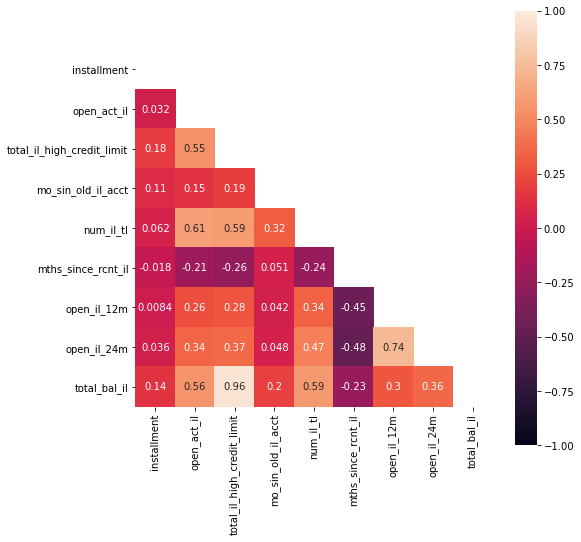

In [16]:
mask = np.zeros_like(payment.corr())
mask[np.triu_indices_from(mask)] = 1

f, ax = plt.subplots(figsize=(8, 8))
corrMatrix = payment.corr()
sns.heatmap(corrMatrix,
            annot=True,
            mask = mask,
           square = True,
           vmin = -1, 
            vmax = 1)
plt.show()

As we can see, we did not find high correlations between the variables, if it is true that between the variables "total_il_high_credit_limit" and "total_bal_il", of a 96% of correlation. (Total current balance of all installment accounts and Total installment high credit/credit limit)

Below, we will study the variables that are related to revolving acounts, to see if there can be a relationship between them.

In [17]:
rev = data.loc[:,['total_rev_hi_lim','mo_sin_old_rev_tl_op','revol_bal','mo_sin_rcnt_rev_tl_op','num_actv_rev_tl','mths_since_recent_revol_delinq',
                        'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','open_rv_12m',
                        'open_rv_24m','revol_util','revol_bal_joint']]

In [18]:
rev.corr()

,total_rev_hi_lim,mo_sin_old_rev_tl_op,revol_bal,mo_sin_rcnt_rev_tl_op,num_actv_rev_tl,mths_since_recent_revol_delinq,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,open_rv_12m,open_rv_24m,revol_bal_joint
total_rev_hi_lim,1.000000,0.243649,0.820697,-0.034542,0.297242,-0.074141,0.397683,0.338757,0.298014,0.129300,0.159540,0.465028
mo_sin_old_rev_tl_op,0.243649,1.000000,0.212032,0.055769,0.155496,-0.014422,0.193237,0.362985,0.150764,-0.015715,-0.046574,0.182503
revol_bal,0.820697,0.212032,1.000000,0.033660,0.287054,-0.052161,0.234626,0.203081,0.289851,0.002738,0.013702,0.527308
mo_sin_rcnt_rev_tl_op,-0.034542,0.055769,0.033660,1.000000,-0.230832,-0.074008,-0.279727,-0.236931,-0.226378,-0.463642,-0.445699,-0.063780
num_actv_rev_tl,0.297242,0.155496,0.287054,-0.230832,1.000000,-0.007392,0.794853,0.556065,0.982955,0.361684,0.456476,0.386888
mths_since_recent_revol_delinq,-0.074141,-0.014422,-0.052161,-0.074008,-0.007392,1.000000,-0.049712,-0.018216,-0.011947,0.082016,0.102905,-0.039983
num_op_rev_tl,0.397683,0.193237,0.234626,-0.279727,0.794853,-0.049712,1.000000,0.759271,0.799778,0.457254,0.590650,0.311566
num_rev_accts,0.338757,0.362985,0.203081,-0.236931,0.556065,-0.018216,0.759271,1.000000,0.551259,0.386671,0.490450,0.321455
num_rev_tl_bal_gt_0,0.298014,0.150764,0.289851,-0.226378,0.982955,-0.011947,0.799778,0.551259,1.000000,0.347333,0.445074,0.386840
open_rv_12m,0.129300,-0.015715,0.002738,-0.463642,0.361684,0.082016,0.457254,0.386671,0.347333,1.000000,0.770288,0.022559


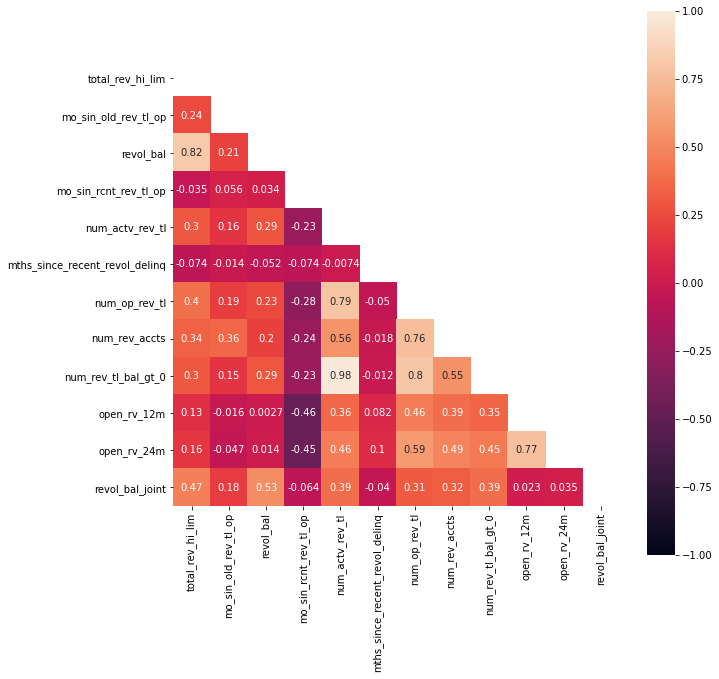

In [19]:
mask = np.zeros_like(rev.corr())
mask[np.triu_indices_from(mask)] = 1

f, ax = plt.subplots(figsize=(10, 10))
corrMatrix = rev.corr()
sns.heatmap(corrMatrix,
            annot=True,
            mask = mask,
           square = True,
           vmin = -1, 
            vmax = 1)
plt.show()

The correlation between the variables that explain the "revolving accounts" has been studied. We found relations of all types, from high correlations between "num_actv_rev_tl" and "num_rev_tl_bal_gt_0", with a correlation of 0.98. (Number of currently active revolving trades and Number of revolving trades with balance >0).

We will also study the variables that are related to bankcards: 

In [20]:
bc = data.loc[:,['bc_util','mths_since_recent_bc','mths_since_recent_bc_dlq','num_actv_bc_tl',
                      'num_bc_sats','num_bc_tl','percent_bc_gt_75','total_bc_limit','bc_open_to_buy']]

In [21]:
bc.corr()

,bc_util,mths_since_recent_bc,mths_since_recent_bc_dlq,num_actv_bc_tl,num_bc_sats,num_bc_tl,percent_bc_gt_75,total_bc_limit,bc_open_to_buy
bc_util,1.000000,0.139538,0.022319,0.070223,-0.181720,-0.177359,0.839325,-0.239535,-0.535323
mths_since_recent_bc,0.139538,1.000000,-0.100533,-0.252631,-0.284790,-0.221621,0.145463,-0.075007,-0.104459
mths_since_recent_bc_dlq,0.022319,-0.100533,1.000000,-0.015639,-0.034255,0.026094,0.015448,-0.092729,-0.076575
num_actv_bc_tl,0.070223,-0.252631,-0.015639,1.000000,0.825967,0.560328,0.029180,0.462091,0.240286
num_bc_sats,-0.181720,-0.284790,-0.034255,0.825967,1.000000,0.699161,-0.177712,0.576046,0.458823
num_bc_tl,-0.177359,-0.221621,0.026094,0.560328,0.699161,1.000000,-0.167060,0.456530,0.389867
percent_bc_gt_75,0.839325,0.145463,0.015448,0.029180,-0.177712,-0.167060,1.000000,-0.204354,-0.433434
total_bc_limit,-0.239535,-0.075007,-0.092729,0.462091,0.576046,0.456530,-0.204354,1.000000,0.835169
bc_open_to_buy,-0.535323,-0.104459,-0.076575,0.240286,0.458823,0.389867,-0.433434,0.835169,1.000000


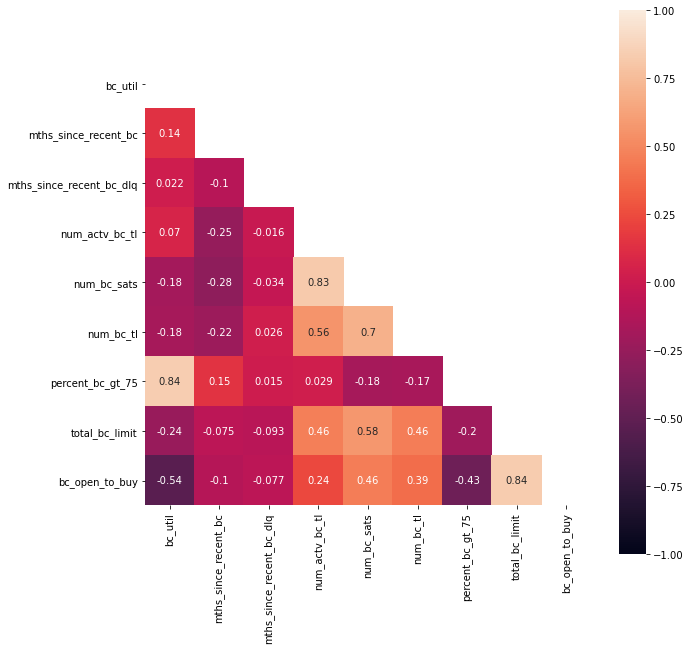

In [22]:
mask = np.zeros_like(bc.corr())
mask[np.triu_indices_from(mask)] = 1

f, ax = plt.subplots(figsize=(10, 10))
corrMatrix = bc.corr()
sns.heatmap(corrMatrix,
            annot=True,
            mask = mask,
           square = True,
           vmin = -1, 
            vmax = 1)
plt.show()

Finally, we have studied the variables that can explain bank cards. In general, they present quite low correlations, although we highlight a high correlation between the variables: "percent_bc_gt_75" and "bc_util". (Percentage of all bankcard accounts > 75% of limit and Ratio of total current balance to high credit/credit limit for all bankcard accounts).

We have decided to represent what type of property the client has on the house, in order to know if it is rented, with a mortgage or if he has finally bought it. This variable can provide us with relevant information about whether the client is going to pay the loan or not.

In [23]:
data.home_ownership.value_counts()

MORTGAGE    229187
RENT        184800
OWN          48145
ANY              2
Name: home_ownership, dtype: int64

<AxesSubplot:>

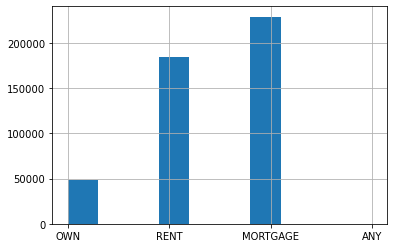

In [24]:
data.home_ownership.hist()

Therefore, we have decided to find out the frequency of the reason for asking for the loan. We can also know if the loan has been paid or not, grouping it by the objective of having asked for it, obtaining the value or 0 in the case that it has been paid without problems and a 1 in the case that the payments have not been paid or are late, since we think that the purpose of the loan is very important.

Below we show the reason why the loan is requested and it is grouped according to whether it has been paid off in full or not.

In [25]:
data.purpose.value_counts()

debt_consolidation    280073
credit_card           103154
home_improvement       27548
other                  22099
major_purchase          8239
medical                 4770
small_business          4276
car                     3895
moving                  2970
vacation                2714
house                   1797
renewable_energy         276
wedding                   11
educational                1
Name: purpose, dtype: int64

In [26]:
data.groupby('purpose')['paid'].value_counts()

purpose             paid
car                 0         3116
                    1          779
credit_card         0        80568
                    1        22586
debt_consolidation  0       206095
                    1        73978
educational         0            1
home_improvement    0        21199
                    1         6349
house               0         1283
                    1          514
major_purchase      0         6186
                    1         2053
medical             0         3492
                    1         1278
moving              0         2055
                    1          915
other               0        16202
                    1         5897
renewable_energy    0          187
                    1           89
small_business      0         2739
                    1         1537
vacation            0         2067
                    1          647
wedding             0           11
Name: paid, dtype: int64

An important part of studying the data is the percentage of NA that presents our observations. For this we are going to study the percentage of NA by variables, with the purpose of eliminating those that present a high percentage of lost or null data. This will be done in the next section.

In [27]:
NANpercentage = data.apply(lambda x: sum(x.isna()/len(data)))
NANpercentage.sort_values(ascending = False).head(60)

member_id                                     1.000000
sec_app_mths_since_last_major_derog           0.998771
orig_projected_additional_accrued_interest    0.997986
payment_plan_start_date                       0.997175
hardship_end_date                             0.997175
hardship_type                                 0.997175
hardship_reason                               0.997175
hardship_status                               0.997175
deferral_term                                 0.997175
hardship_amount                               0.997175
hardship_last_payment_amount                  0.997175
hardship_payoff_balance_amount                0.997175
hardship_loan_status                          0.997175
hardship_dpd                                  0.997175
hardship_length                               0.997175
hardship_start_date                           0.997175
sec_app_revol_util                            0.997036
sec_app_open_acc                              0.996963
sec_app_in

In [28]:
data.groupby('disbursement_method')['paid'].value_counts()

disbursement_method  paid
Cash                 0       345194
                     1       116613
DirectPay            1            9
                     0            7
Name: paid, dtype: int64

We have found that the proportion of paying and non-paying customers based on how they received the loan ("disbursement_method") is unrelated, so we have decided that it is not relevant to the model.

In [29]:
del data['disbursement_method']